GEOSTORY PROJECT
ELECTRONIC PUBLISHING AND DIGITAL STORYTELLING EXAM (DHDK MASTER DEGREE)
A project by Ariele Santello, Giulia Massimino, Benedetta Togni and Szilvia Baràth


Step 0: Extract the bithplace of each artHistorian, the goal is to find each respective birthplace to start the geospatial analysis

In [2]:
#Import the libraries
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib import URIRef 
from rdflib.namespace import RDF , RDFS
import SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format into the graph
result = g.parse("artchives.nq", format='nquads')

#create a variable for the name spaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")

In [3]:
#create a set of all the URIs related to  arthistorians that are creators of a collection and that are entities in Wikidata 
arthistorians_list = set() 

for s,p,o in g.triples((None, wdt.P170, None)):
    if "www.wikidata.org/entity/" in str(o):
        arthistorians_list.add("<" +str(o) + ">")
        
print(arthistorians_list) 

#merging all the results in the variable arthistorians
arthistorians = ' '.join(arthistorians_list) 
print(arthistorians)


{'<http://www.wikidata.org/entity/Q60185>', '<http://www.wikidata.org/entity/Q19997512>', '<http://www.wikidata.org/entity/Q537874>', '<http://www.wikidata.org/entity/Q85761254>', '<http://www.wikidata.org/entity/Q1641821>', '<http://www.wikidata.org/entity/Q1089074>', '<http://www.wikidata.org/entity/Q1373290>', '<http://www.wikidata.org/entity/Q88907>', '<http://www.wikidata.org/entity/Q18935222>', '<http://www.wikidata.org/entity/Q3051533>', '<http://www.wikidata.org/entity/Q41616785>', '<http://www.wikidata.org/entity/Q1629748>', '<http://www.wikidata.org/entity/Q55453618>', '<http://www.wikidata.org/entity/Q61913691>', '<http://www.wikidata.org/entity/Q1271052>', '<http://www.wikidata.org/entity/Q2824734>', '<http://www.wikidata.org/entity/Q1712683>', '<http://www.wikidata.org/entity/Q6700132>', '<http://www.wikidata.org/entity/Q1715096>', '<http://www.wikidata.org/entity/Q457739>', '<http://www.wikidata.org/entity/Q1296486>', '<http://www.wikidata.org/entity/Q995470>', '<http://w

In [4]:
#Select all the URIs and labels of arthistorians and their related birthplace(wdt:P19) 
birthplace_query = """
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT DISTINCT ?birthplace ?birthplace_label ?historian ?historian_label 
WHERE {
   VALUES ?historian {"""+arthistorians+"""} .  #include the variable in the query string
   ?historian rdfs:label ?historian_label .
   ?historian wdt:P19 ?birthplace .
   ?birthplace rdfs:label ?birthplace_label . 
   FILTER (langMatches(lang(?birthplace_label), "EN"))
   FILTER (langMatches(lang(?historian_label), "EN"))
   }
"""


# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(birthplace_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

In [5]:
#looking if there are URIs and  label names in the graph, print the birthplace of the arthistorian and its related label
#print the label of arthistorian with the uri and the label of their birthplace 

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(birthplace_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()
seen = set()
for result in results["results"]["bindings"]:
    historian_uri = result ["historian"]["value"]
    if "historian_label" in result:
        historian_label = result["historian_label"]["value"]
            #print(historian_label)
        if "birthplace" in result:
            birthplace = result["birthplace"]["value"]
        if "birthplace_label" in result:
            birthplace_label = result["birthplace_label"]["value"]
            print(historian_label, "was born in", birthplace_label)
            #if there are URI and LABEL in the graph
            #g.add((URIRef(historian_uri) , URIRef(wdt.P19) , URIRef(birthplace) ))
            #g.add((URIRef(birthplace) , RDFS.label , Literal(birthplace_label) ))
        
    else:
        print("Empty dataset")
    g.add((URIRef(historian_uri) , URIRef(wdt.P19) , URIRef(birthplace) ))
    g.add((URIRef(birthplace) , RDFS.label , Literal(birthplace_label) ))
        

 
#new 'nq' file, where the property wdt:p19 is contained. This property is missing in artchives.nq
g.serialize(destination= 'artchives3_birthplaces.nq', format='nquads') 

Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Kurt Badt was born in Berlin
Kurt Badt was born in Berlin
Kurt Badt was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
John Pope-Hennessy was born in London
John Pope-Hennessy was born in London
John Pope-Hennessy was born in London
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Julius S. Held was born in Mosbach
Julius S. Held was born in Mosbach
Julius S. Held was born in Mosbach
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Mu

In [6]:
#put the data in a tabular format (csv) and clean data
import csv
import pandas as pd
import pandas_profiling as pp
import rdflib
import csv
 

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse the file created before 
result = g.parse("artchives3_birthplaces.nq", format='nquads')  

 
#Select the label of arthistorians and the label of their birthplaces 
qres = g.query(
  """PREFIX wdt: <http://www.wikidata.org/prop/direct/>
  SELECT DISTINCT  ?historian_label ?birthplace_label
  WHERE { 
     ?historian wdt:P19 ?birthplace ;
     rdfs:label ?historian_label.
     ?birthplace rdfs:label ?birthplace_label .
     }
    """)

#create a new file from the parsed query

with open('FG_test_birth.csv', 'wt', encoding="utf8") as out_file:
    csv_writer = csv.writer(out_file, delimiter=';')
    csv_writer.writerow(['Historian', 'Birthplace'])
    for row in qres:
        csv_writer.writerow([row.historian_label.strip(), row.birthplace_label.strip()])


In [57]:
import csv
import pandas as pd
import pandas_profiling as pp
#visualize the new csv file

df = pd.read_table("FG_test_birth.csv", delimiter =";", engine = "python", encoding = 'utf8')
df.columns = df.columns.str.replace(' ', '')

print(df.head(30))


                 Historian   Birthplace
0           Adolfo Venturi       Modena
1           Adolfo Venturi       Modena
2         Eugenio Battisti        Turin
3            Luigi Salerno         Rome
4            Luigi Salerno         Rome
5            Luigi Salerno         Rome
6            Luigi Salerno         Rome
7            Luigi Salerno         Rome
8       John Pope-Hennessy       London
9       John Pope-Hennessy       London
10      John Pope-Hennessy       London
11      John Pope-Hennessy       London
12      John Pope-Hennessy       London
13      John Pope-Hennessy       London
14  Otto Lehmann-Brockhaus         Unna
15  Otto Lehmann-Brockhaus         Unna
16  Otto Lehmann-Brockhaus         Unna
17  Otto Lehmann-Brockhaus         Unna
18  Otto Lehmann-Brockhaus         Unna
19  Otto Lehmann-Brockhaus         Unna
20         Ernst Steinmann  Jördenstorf
21         Ernst Steinmann  Jördenstorf
22         Ernst Steinmann  Jördenstorf
23         Ernst Steinmann  Jördenstorf


In [7]:
#Delete the duplicates from the csv created before
import pandas as pd
file_name = "FG_test_birth.csv"
file_name_output = "birthplaces_without_dupes.csv"

df = pd.read_csv(file_name, sep=";", engine = "python", encoding = 'utf8')
df.columns = df.columns.str.replace(' ', '')
#drop duplicates from fg_test_birth, clean file

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=";", encoding="utf8")

In [10]:
#print the dataframe with pandas
df = pd.read_csv("birthplaces_without_dupes.csv", delimiter=';', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')

df.drop_duplicates('Historian', keep= 'first')
df.drop_duplicates('Birthplace', keep= 'first')

df = df.drop([20], axis=0) #we delete Forl?  PRIMA ERA 15 ORA è 20!!!!
df.head(30)

Historian   Birthplace
0              Werner Cohn       Berlin
1           Adolfo Venturi       Modena
2            Wolfgang Lotz    Heilbronn
3        Ulrich Middeldorf     Staßfurt
4            Federico Zeri         Rome
5            Gustav Ludwig      Nauheim
6            Luigi Salerno         Rome
7          Ernst Steinmann  Jördenstorf
8         Ellis Waterhouse        Epsom
9       John Pope-Hennessy       London
10         Kornél Fabriczy       Levoča
11             Aby Warburg      Hamburg
12     Richard Krautheimer        Fürth
13          Julius S. Held      Mosbach
14         Ernst Kitzinger       Munich
15        Eugenio Battisti        Turin
16  Otto Lehmann-Brockhaus         Unna
17               Kurt Badt       Berlin
18           Leo Steinberg       Moscow
19         Stefano Tumidei        Forlì

In [11]:
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Birthplace', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

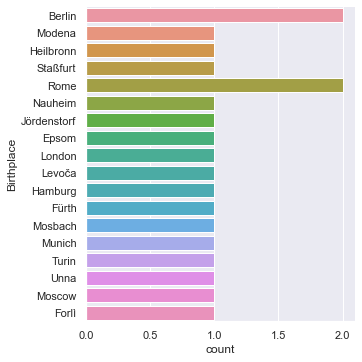

In [12]:
#plot the counting 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
my_graph = sns.catplot(y="Birthplace", kind= "count", data= df) #two historians born in rome, 2 in berlin

see the map in the web(put here the URI!!!)

In [13]:
# Search all historians that have the property CITIZENSHIP
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()
world = dict()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

unique_countries = set()        #set of all art historians that have the property citizenship
for s,p,o in g.triples(( None, wdt.P27, None)):   # wikidata = P27: citizenship
    for s1,p1,o1 in g.triples(( o, RDFS.label, None)):  
        unique_countries.add(o1.strip())
for country in unique_countries:
    print(country)
    
unique_historians = set()       #set of all art historians that are creators of a collection
for s,p,o in g.triples((None, wdt.P170, None)):
    for s1,p1,o1 in g.triples((o, RDFS.label, None)): 
        unique_historians.add(o1.strip())
for historian in unique_historians:
    #print(historian)    
    
#search the label of arthistorians's(Q5) country of citizenship(P27) and count how many historians come from a specific country   
    query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/> 
    SELECT DISTINCT (COUNT(?individual) AS ?ind) ?country ?name
    WHERE {
        VALUES ?class {<http://www.wikidata.org/entity/Q5>}
        VALUES ?property{<http://www.wikidata.org/prop/direct/P27>} 
        ?individual rdf:type ?class ; 
                    ?property ?country .
        ?country rdfs:label ?name
    }
    GROUP BY ?name ?country
    """) 

with open('citizenship_count.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',')
    csv_writer.writerow(['Citizenship', 'Count'])
    for row in query_result:
        csv_writer.writerow([row.name.strip(), row.ind]) 
        
import pandas as pd
data = pd.read_csv('citizenship_count.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(30)

United States of America
Italy
Russia
Germany
Hungary
England


Citizenship  Count
0                    Germany     12
1                      Italy      6
2                    Germany     12
3                    England      2
4                    Germany     12
5                    Germany     12
6                     Russia      1
7                      Italy      6
8                      Italy      6
9                      Italy      6
10                   Germany     12
11                   Germany     12
12                     Italy      6
13                     Italy      6
14                     Italy      6
15  United States of America      2
16                     Italy      6
17                    Russia      1
18                     Italy      6
19  United States of America      2
20                     Italy      6
21                   Germany     12
22                   Germany     12
23                     Italy      6
24  United States of America      2
25                   Germany     12
26  United States of America      2
27                   Germany     12
28                   Germany     12
29  United States of America      2

In [14]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('Citizenship', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

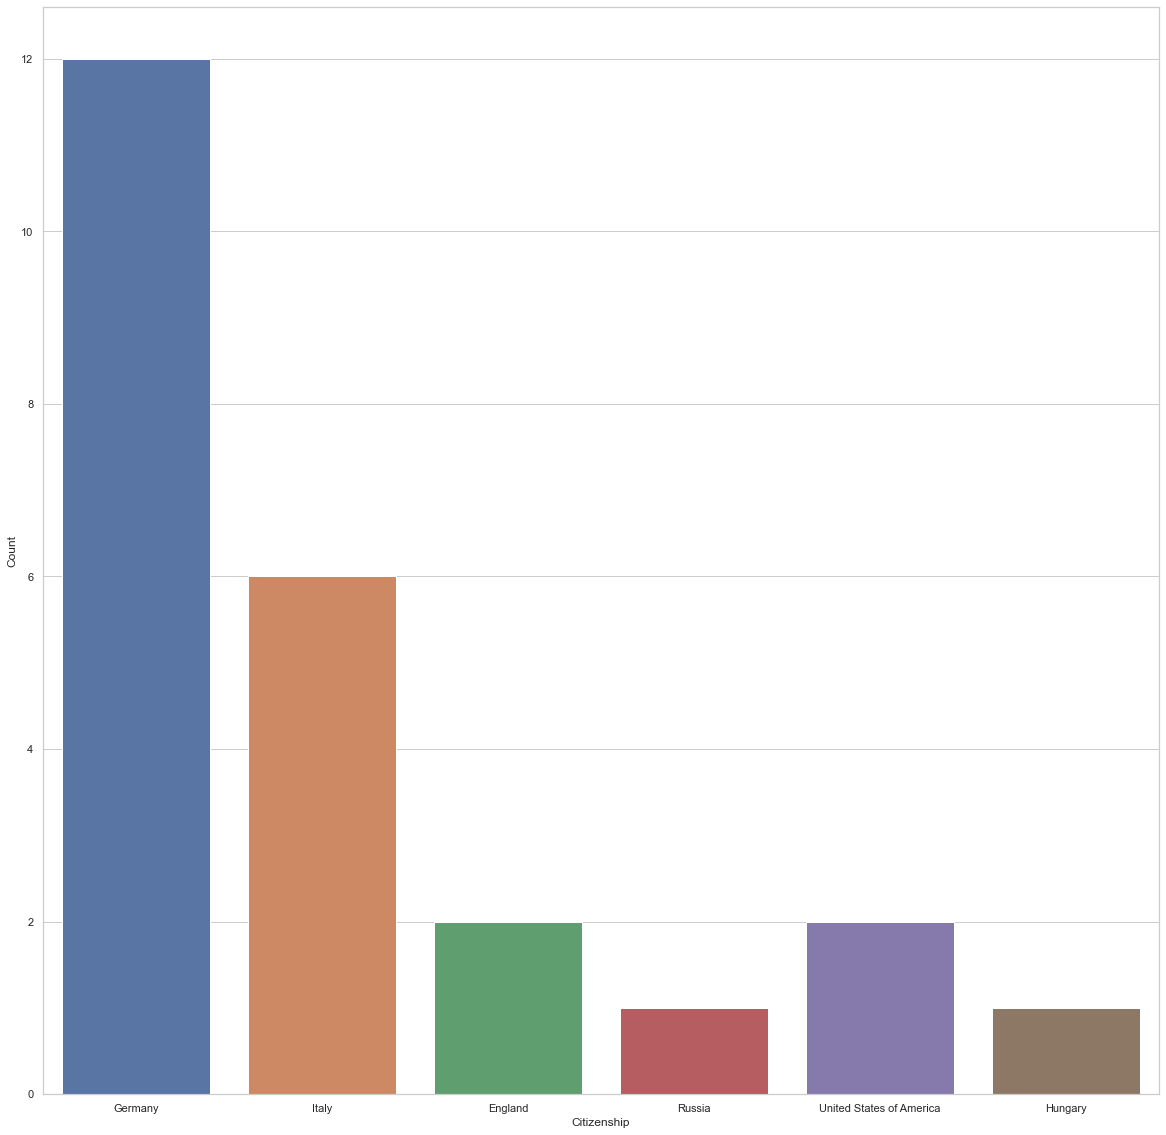

In [15]:
#plot the information found to see clearly how many historian come from each country
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Citizenship", y="Count", data=data) #plot the distribution:citizenships of the historians

THERE ARE: 12 HISTORIANS FROM GERMANY, 6 FROM ITALY, 1 FROM HUNGARY, 1 FROM RUSSIA, 2 FROM ENGLAND AND 2 FROM U.S.A

In [16]:
#TO VERIFY IF THE COUNT IS CORRECT

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()
world_2 = dict()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads') 

#search art historians and their country of citizenship (with related labels)
query_result_2 = g.query("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/> 
SELECT DISTINCT ?individual ?label ?country ?name 
WHERE {
    VALUES ?class {<http://www.wikidata.org/entity/Q5>}
    VALUES ?property{<http://www.wikidata.org/prop/direct/P27>}
    ?individual rdf:type ?class ;
                rdfs:label ?label;
                ?property ?country .
    ?country rdfs:label ?name .
}
GROUP BY ?individual ?label ?country ?name 
""")

#create a dictionary with the art historian and the related country of citizenship
for query_res in query_result_2:
    for query in query_res:
        world_2.update({str(query_res["name"]):str(query_res["label"])})
print(world_2)   

{'     Germany': 'Gustav Ludwig', '  Italy': 'Adolfo Venturi', '  Germany': 'Ulrich Middeldorf', '             Germany': '          Ernst Kitzinger', '           United States of America': 'Everett Fahy', '           Italy': '         Federico Zeri', '                        Italy': '   Federico Zeri', ' Germany': '               Otto Lehmann-Brockhaus', '                    Germany': '            Ernst Steinmann', '         Germany': 'Kurt Badt', '       Italy': 'Eugenio Battisti', '                    United States of America': 'Julius S. Held', '      Germany': 'Werner Cohn', '      Italy': '         Federico Zeri', 'United States of America': '                           Everett Fahy', '               Germany': '            Wolfgang Lotz', '         Italy': 'Luisa Vertova', '                  Germany': '       Richard Krautheimer', '                 Germany': '       Richard Krautheimer', 'Italy': 'Luisa Vertova', 'Germany': 'Wolfgang Lotz', '                United States of America

In [17]:
#Create a dataframe with pandas to see in a better way the information
import csv
import rdflib

with open('dict_city.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',')
    csv_writer.writerow(['Country', 'Historian'])
    for row in query_result_2:
        csv_writer.writerow([row.name.strip(), row.label.strip(),])
        
        
import pandas as pd
data = pd.read_csv('dict_city.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(30)

Country               Historian
0                    Germany  Otto Lehmann-Brockhaus
1                      Italy           Federico Zeri
2                    Germany         Ernst Kitzinger
3                    Germany     Richard Krautheimer
4   United States of America            Everett Fahy
5                    Germany         Ernst Steinmann
6                      Italy         Stefano Tumidei
7                    Germany             Aby Warburg
8                      Italy           Federico Zeri
9                    Germany           Gustav Ludwig
10                   Germany         Fritz Heinemann
11                   Germany     Richard Krautheimer
12                   Germany     Richard Krautheimer
13                   Germany         Fritz Heinemann
14                     Italy           Luigi Salerno
15  United States of America          Julius S. Held
16                   Germany       Ulrich Middeldorf
17                     Italy          Adolfo Venturi
18                     Italy           Federico Zeri
19  United States of America          Julius S. Held
20                   Germany  Otto Lehmann-Brockhaus
21                   Germany     Richard Krautheimer
22                   Germany         Fritz Heinemann
23                   Germany         Ernst Kitzinger
24                   Germany  Otto Lehmann-Brockhaus
25                   Germany  Otto Lehmann-Brockhaus
26                     Italy           Federico Zeri
27                     Italy        Eugenio Battisti
28                   Germany       Ulrich Middeldorf
29                   Germany         Julian Kliemann

In [18]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(data.drop_duplicates('Country', keep= 'last')) 

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
#delete the duplicates from the file dict_city created before and create a new clean file
import pandas as pd
file_name = "dict_city.csv"
file_name_output = "dict_city_without_dupes.csv"
dupes = set()
df = pd.read_csv(file_name, sep=";", engine = "python", encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')

df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=";", encoding = "utf8")

In [21]:
#use the new clean file created to create a matrix that shows the number of art historian for each country
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
#we create a matrice to plot our data from dict city
with open('dict_city_without_dupes.csv', encoding="utf8") as csvfile:
    historians = [] 
    countries = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique historians
        if row[1] not in countries:
            countries.append(row[1]) # create the list of unique countries
    print(historians)
    print(countries)
    countries.sort()
    histo_zeros_matrix = np.array(np.zeros(( len(countries), len(historians) ))) 
    
    for i, histo in enumerate(historians):  
        for j, country in enumerate(countries):
            with open('dict_city_without_dupes.csv', encoding="utf-8") as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == country and row[0] == histo:
                        histo_zeros_matrix[j][i] = int(histo_zeros_matrix[j][i])+1
    
    histo_zeros_matrix
    
# put everything together
data["historians"] = historians
for i, country in enumerate(countries):
    data[country] = list(histo_zeros_matrix[i])
print(data) 

['Germany', 'Italy', 'United States of America', 'England', 'Russia', 'Hungary']
['Otto Lehmann-Brockhaus', 'Federico Zeri', 'Ernst Kitzinger', 'Richard Krautheimer', 'Everett Fahy', 'Ernst Steinmann', 'Stefano Tumidei', 'Aby Warburg', 'Gustav Ludwig', 'Fritz Heinemann', 'Luigi Salerno', 'Julius S. Held', 'Ulrich Middeldorf', 'Adolfo Venturi', 'Eugenio Battisti', 'Julian Kliemann', 'Wolfgang Lotz', 'Luisa Vertova', 'Kurt Badt', 'Werner Cohn', 'John Pope-Hennessy', 'Ellis Waterhouse', 'Leo Steinberg', 'KornÃ©l Fabriczy']
{'historians': ['Germany', 'Italy', 'United States of America', 'England', 'Russia', 'Hungary'], 'Aby Warburg': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Adolfo Venturi': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ellis Waterhouse': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Ernst Kitzinger': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ernst Steinmann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Eugenio Battisti': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Everett Fahy': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Federico Zeri': [0.0, 1.0

In [51]:
#create a BARCHART : HISTORIAND AND THEIR COUNTRY OF CITIZENSHIP

from bokeh.io import output_file, show, curdoc
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import random

output_file("bar_nested_colormapped_historian_citizenship.html") #outputfile
curdoc().theme = 'dark_minimal'

countries = ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia']
historians = ['Werner Cohn', 'Ulrich Middeldorf', 'Gustav Ludwig', 'Federico Zeri', 'Wolfgang Lotz', 'Fritz Heinemann', 'Everett Fahy', 'Adolfo Venturi', 'Luigi Salerno', 'Ernst Kitzinger', 'Richard Krautheimer', 'Kurt Badt', 'Aby Warburg', 'Otto Lehmann-Brockhaus', 'John Pope-Hennessy', 'Stefano Tumidei', 'Luisa Vertova', 'Ernst Steinmann', 'KornÃ©l Fabriczy', 'Julius S. Held', 'Leo Steinberg', 'Eugenio Battisti', 'Julian Kliemann', 'Ellis Waterhouse']

data = {'historians': ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia'], 'Aby Warburg': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Adolfo Venturi': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ellis Waterhouse': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Ernst Kitzinger': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ernst Steinmann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Eugenio Battisti': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Everett Fahy': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Federico Zeri': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Fritz Heinemann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Gustav Ludwig': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'John Pope-Hennessy': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Julian Kliemann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Julius S. Held': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'KornÃ©l Fabriczy': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'Kurt Badt': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Leo Steinberg': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'Luigi Salerno': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Luisa Vertova': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Otto Lehmann-Brockhaus': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Richard Krautheimer': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Stefano Tumidei': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ulrich Middeldorf': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Werner Cohn': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Wolfgang Lotz': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
number_of_colors = 24 #number of arthistorians present in the file artchives.nq
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]



x = [ (country, historian) for country in countries for historian in historians ]
counts = sum(zip(data['Werner Cohn'], data['Ulrich Middeldorf'], data['Gustav Ludwig'],
                 data['Federico Zeri'], data['Wolfgang Lotz'], data['Fritz Heinemann'], 
                 data['Everett Fahy'],data['Adolfo Venturi'],data['Luigi Salerno'],
                 data['Ernst Kitzinger'],data['Richard Krautheimer'],data['Kurt Badt'],
                 data['Aby Warburg'],data['Otto Lehmann-Brockhaus'],
                 data['John Pope-Hennessy'], data['Stefano Tumidei'], data['Luisa Vertova'], data['Ernst Steinmann'], 
                 data['KornÃ©l Fabriczy'], data['Julius S. Held'], data['Leo Steinberg'], 
                 data['Eugenio Battisti'], data['Julian Kliemann'], data['Ellis Waterhouse']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=1500, title="Historians' Countries of Citizenship",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white", 
       fill_color=factor_cmap('x', palette=palette, factors=historians, start=1, end=2,))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xaxis.major_label_standoff = 25


#p.xaxis.axis_label= 'Kunsthistorisches Institut in Florenz'
p.xgrid.grid_line_color = None


show(p)
#this is a distributional barplot: the country of citizenship of each art historian 
#this is not so user friendly

see the distribution of the keepers (institutes) in which the historians stored their collections

In [52]:
#search for cities and countries of the keepers
import rdflib
import csv
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pprint


wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
#we do not need to use sparqlwrapper wikidata endpoint!

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

#search the label of: the keepers(institutes), their country and the city in which they are located
query_keepers = g.query('''
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wdp: <http://www.wikidata.org/wiki/Property:>
PREFIX art: <https://w3id.org/artchives/>
PREFIX wd: <http://www.wikidata.org/entity/>
SELECT DISTINCT  ?nameKeeper ?nameCountry ?nameCity
WHERE {
 ?keeper a wd:Q31855 ; 
         rdfs:label ?nameKeeper ;
         wdt:P131 ?city;
         wdt:P17 ?country .
 ?country rdfs:label ?nameCountry .
 ?city rdfs:label ?nameCity .
}
GROUP BY  ?nameKeeper ?nameCountry ?nameCity
''') 

with open('keepers_city_b.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    csv_writer.writerow(["nameKeeper","nameCountry", "nameCity"])
    # access the rows of the query results
    for nameKeeper, nameCountry, nameCity in query_keepers:
        # write in the csv
        csv_writer.writerow([nameKeeper.strip(), nameCountry.strip(), nameCity.strip()])        

        
import pandas as pd
data = pd.read_csv('keepers_city_b.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(20)

nameKeeper               nameCountry     nameCity
0   Getty Research Institute  United States of America  Los Angeles
1   Getty Research Institute  United States of America  Los Angeles
2   Getty Research Institute  United States of America  Los Angeles
3   Getty Research Institute  United States of America  Los Angeles
4   Getty Research Institute  United States of America  Los Angeles
5   Getty Research Institute  United States of America  Los Angeles
6   Getty Research Institute  United States of America  Los Angeles
7   Getty Research Institute  United States of America  Los Angeles
8   Getty Research Institute  United States of America  Los Angeles
9   Getty Research Institute  United States of America  Los Angeles
10  Getty Research Institute  United States of America  Los Angeles
11  Getty Research Institute  United States of America  Los Angeles
12  Getty Research Institute  United States of America  Los Angeles
13  Getty Research Institute  United States of America  Los Angeles
14  Getty Research Institute  United States of America  Los Angeles
15  Getty Research Institute  United States of America  Los Angeles
16  Getty Research Institute  United States of America  Los Angeles
17  Getty Research Institute  United States of America  Los Angeles
18  Getty Research Institute  United States of America  Los Angeles
19  Getty Research Institute  United States of America  Los Angeles

In [53]:
#delete duplicates from the file created before and create a new clean file
import pandas as pd
file_name = "keepers_city_b.csv"
file_name_output = "kep_cit_new_without_dupes.csv" #create file without duplicates

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')

df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [55]:
#create a dataframe with pandas of the new file
df = pd.read_csv("kep_cit_new_without_dupes.csv", delimiter=',', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')


df = df.drop([1], axis=0) #there are wrong data: the kunsthistorisches institute is in Italy, not in Germany, 
                          #so we delete the wrong row form the file

df.head(40)

nameKeeper  \
0                           Getty Research Institute   
2              Kunsthistorisches Institut in Florenz   
3  Bibliotheca Hertziana %u2013 Max Planck Instit...   
4                           Fondazione Federico Zeri   
5                           Scuola Normale Superiore   

                nameCountry     nameCity  
0  United States of America  Los Angeles  
2                     Italy     Florence  
3                     Italy         Rome  
4                     Italy      Bologna  
5                     Italy         Pisa

In [56]:
#style the dataframe
df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'}) 
 

Bologna, Rome, Pisa, Los Angeles and lorence are the cities in which the institutes are located!

In [62]:
#delete the duplicates from the file and create a new file without the name of the cities, but only the countries of the keepers
import pandas as pd
file_name = "kep_cit_new_without_dupes.csv"
file_name_output = "countries_with_keepers_final.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')

df = df.drop("nameCity", axis=1)
df = df.drop([1], axis=0)

df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8") #drop the cities to count the countries

In [63]:
#create a dataframe with pandas of the new file containing only the label of keepers and their country
df = pd.read_csv("countries_with_keepers_final.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
df.head(40)

nameKeeper               nameCountry
0                           Getty Research Institute  United States of America
1              Kunsthistorisches Institut in Florenz                     Italy
2  Bibliotheca Hertziana %u2013 Max Planck Instit...                     Italy
3                           Fondazione Federico Zeri                     Italy
4                           Scuola Normale Superiore                     Italy

In [64]:
#profile the countries of the keepers
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('nameKeeper', keep= 'last'))

pp.ProfileReport(data.drop_duplicates('nameCountry', keep= 'last')) 

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

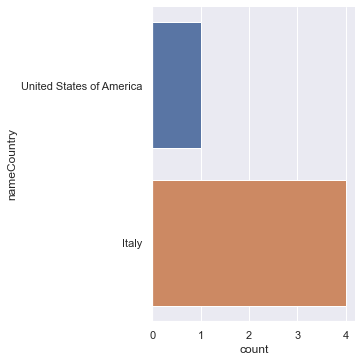

In [65]:
#plot the counting: how many keepers per country
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
my_graph = sns.catplot(y="nameCountry", kind= "count", data= df)

there are 4 institutes in Italy, and one in U.S.A

In [66]:
#create a MATRIX to produce a PIE CHART
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('countries_with_keepers_final.csv') as csvfile:
    country = [] 
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[1] not in country:
            country.append(row[1]) # create the list of unique countries
       
    print(country)
    keepers_zeros_matrix = np.array(np.zeros((len(country) ))) # rows, columns
    
    for i, con in enumerate(country):  
            with open('countries_with_keepers_final.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == con:  
                        keepers_zeros_matrix[i] = int(keepers_zeros_matrix[i])+1
    
    keepers_zeros_matrix
    

print(keepers_zeros_matrix)

['United States of America', 'Italy']
[1. 4.]


In [69]:
#create a PIE CHART: NUMBER OF INSTITUTES PER COUNTRIES
from math import pi

import pandas as pd

from bokeh.io import output_file, show, curdoc
#from bokeh.palettes import 
from bokeh.plotting import figure
from bokeh.transform import cumsum
import random

output_file("pie.html")
curdoc().theme = 'dark_minimal'

x ={ 'Italy': 4, 
      'United States of America': 1
 }

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'nameCountry'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
number_of_colors = 2 
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
data['color'] = palette

p = figure(plot_height=700, title="Number of Institutes per Countries", toolbar_location=None,
           tools="hover", tooltips="@nameCountry: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='nameCountry', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

now, we query and plot the relation between collections and historians

In [70]:
# search related collections to historians

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

#search the label of the collection and of the historian that have created it (P170)
    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Historian
    WHERE {
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Historian
    """)

with open('coll_histor.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Historian'])
    for Collection, Historian in query_result:
        csv_writer.writerow([Collection.strip(), Historian.strip()]) 
        
#create a dataframe with pandas        
import pandas as pd
data = pd.read_csv('coll_histor.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

Collection               Historian
0                       Leo Steinberg research papers           Leo Steinberg
1                       Leo Steinberg research papers           Leo Steinberg
2                                   Fondo Aby Warburg             Aby Warburg
3                          Nachlass Ulrich Middeldorf       Ulrich Middeldorf
4                          Nachlass Ulrich Middeldorf       Ulrich Middeldorf
5   Nachlass Fritz Heinemann, Notizen zur venezian...         Fritz Heinemann
6                                       Fototeca Fahy            Everett Fahy
7                                       Fototeca Fahy            Everett Fahy
8                            Fototeca Julian Kliemann         Julian Kliemann
9                            Fototeca Stefano Tumidei         Stefano Tumidei
10                               Nachlass Werner Cohn             Werner Cohn
11                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
12                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
13                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
14                              Julius S. Held papers          Julius S. Held
15                              Julius S. Held papers          Julius S. Held
16                                      Fototeca Zeri           Federico Zeri
17                                      Fototeca Zeri           Federico Zeri
18                                      Fototeca Zeri           Federico Zeri
19                                      Fototeca Zeri           Federico Zeri
20                                 Nachlass Kurt Badt               Kurt Badt
21                  Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
22                  Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
23                  Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
24                           Nachlass Ernst Steinmann         Ernst Steinmann
25                           Nachlass Ernst Steinmann         Ernst Steinmann
26                           Nachlass Ernst Steinmann         Ernst Steinmann
27                    Nachlass Cornelius von Fabriczy        KornÃ©l Fabriczy
28                      Luigi Salerno research papers           Luigi Salerno
29                             Archivio Luisa Vertova           Luisa Vertova

In [71]:
#delete the duplicates from the file created before
import pandas as pd
file_name = "coll_histor.csv"
file_name_output = "coll_histor_no_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')
#we delete the duplicates from the file

df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [50]:
df = pd.read_csv("coll_histor_no_dupes.csv", delimiter=',', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates("Collection", keep= "last")
df.drop_duplicates("Historian", keep="last")
#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)


df.head(40)

Collection               Historian
0                        Nachlass Richard Krautheimer     Richard Krautheimer
1                   Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
2                           John Pope-Hennessy papers      John Pope-Hennessy
3                 Battisti Eugenio (complex of fonds)        Eugenio Battisti
4                          Nachlass Ulrich Middeldorf       Ulrich Middeldorf
5                              Nachlass Wolfgang Lotz           Wolfgang Lotz
6                                Nachlass Werner Cohn             Werner Cohn
7                                       Fototeca Zeri           Federico Zeri
8                                   Fondo Aby Warburg             Aby Warburg
9                       Luigi Salerno research papers           Luigi Salerno
10                    Nachlass Cornelius von Fabriczy         Kornél Fabriczy
11  Nachlass Fritz Heinemann, Notizen zur venezian...         Fritz Heinemann
12                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
13                              Julius S. Held papers          Julius S. Held
14                           Fototeca Julian Kliemann         Julian Kliemann
15                                      Fototeca Fahy            Everett Fahy
16   Ellis K. Waterhouse notebooks and research files        Ellis Waterhouse
17                           Fototeca Stefano Tumidei         Stefano Tumidei
18                           Ulrich Middledorf papers       Ulrich Middeldorf
19                             Archivio Luisa Vertova           Luisa Vertova
20                          Gustav Ludwig-Vermächtnis           Gustav Ludwig
21                      Leo Steinberg research papers           Leo Steinberg
22                  Venturi Adolfo (complex of fonds)          Adolfo Venturi
23                           Nachlass Ernst Steinmann         Ernst Steinmann
24                                 Nachlass Kurt Badt               Kurt Badt

In [72]:
#we style the dataframe: each historian has a corresponding collection, 1-to-1
df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'}) 

new query: relate the historians to the periods treated in their collections

In [74]:
#search the label of art historians and the period treated in their collection

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Historian ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                    rdfs:label ?Collection ;
                    art:hasSubjectPeriod ?perio .
        ?perio rdfs:label ?Period .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Historian ?Period
    """)

#create a csv file with the information gathered
with open('historian_periods.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Historian', 'Period'])
    for row in query_result:
        csv_writer.writerow([row.Historian.strip(), row.Period.lower().strip()])
        
#create a dataframe with pandas        
import pandas as pd
data = pd.read_csv('historian_periods.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)


Historian        Period
0   Otto Lehmann-Brockhaus   middle ages
1   Otto Lehmann-Brockhaus   middle ages
2   Otto Lehmann-Brockhaus   middle ages
3   Otto Lehmann-Brockhaus   middle ages
4   Otto Lehmann-Brockhaus   middle ages
5   Otto Lehmann-Brockhaus   middle ages
6   Otto Lehmann-Brockhaus   middle ages
7   Otto Lehmann-Brockhaus   middle ages
8   Otto Lehmann-Brockhaus   middle ages
9   Otto Lehmann-Brockhaus   middle ages
10  Otto Lehmann-Brockhaus   middle ages
11  Otto Lehmann-Brockhaus   middle ages
12  Otto Lehmann-Brockhaus   middle ages
13  Otto Lehmann-Brockhaus   middle ages
14  Otto Lehmann-Brockhaus   middle ages
15  Otto Lehmann-Brockhaus   middle ages
16  Otto Lehmann-Brockhaus   middle ages
17  Otto Lehmann-Brockhaus   middle ages
18           Luigi Salerno  18th century
19           Luigi Salerno  18th century
20           Luigi Salerno  18th century
21           Luigi Salerno       baroque
22           Luigi Salerno       baroque
23           Luigi Salerno       baroque
24           Luigi Salerno       baroque
25           Luigi Salerno       baroque
26           Luigi Salerno       baroque
27           Luigi Salerno       baroque
28           Luigi Salerno       baroque
29           Luigi Salerno       baroque

In [75]:
#delete the duplicates from the file created before
import pandas as pd
file_name = "historian_periods.csv"
file_name_output = "historian_periods_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')

  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [76]:
df = pd.read_csv("historian_periods_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')

df.drop_duplicates('Historian', keep= 'last')
df.drop_duplicates('Period', keep= 'last')


df.head(40)

Historian                                Period
0   Otto Lehmann-Brockhaus                           middle ages
1            Luigi Salerno                          18th century
2            Luigi Salerno                               baroque
3            Luigi Salerno                          17th century
4        Ulrich Middeldorf                           renaissance
5         Ellis Waterhouse                               baroque
6         Ellis Waterhouse                             mannerism
7          Stefano Tumidei                               baroque
8          Stefano Tumidei                          16th century
9          Stefano Tumidei                          17th century
10         Stefano Tumidei                          15th century
11         Stefano Tumidei                           renaissance
12         Stefano Tumidei                         neoclassicism
13         Stefano Tumidei                          18th century
14     Richard Krautheimer  early christian art and architecture
15     Richard Krautheimer                         byzantine art
16     Richard Krautheimer                           renaissance
17     Richard Krautheimer                               baroque
18         Ernst Steinmann                           renaissance
19         Ernst Kitzinger                         byzantine art
20         Ernst Kitzinger                           middle ages
21         Ernst Kitzinger  early christian art and architecture
22             Aby Warburg                           renaissance
23      John Pope-Hennessy                           renaissance
24      John Pope-Hennessy                          15th century
25         Julian Kliemann                               baroque
26         Julian Kliemann                             mannerism
27         Julian Kliemann                          17th century
28         Julian Kliemann                          15th century
29         Julian Kliemann                          16th century
30         Julian Kliemann                           renaissance
31             Werner Cohn                           middle ages
32             Werner Cohn                           renaissance
33       Ulrich Middeldorf                              cold war
34           Luisa Vertova                         neoclassicism
35           Luisa Vertova                          19th century
36           Luisa Vertova                          18th century
37           Luisa Vertova                          16th century
38           Luisa Vertova                           romanticism
39           Luisa Vertova                          17th century

In [77]:
#profiling
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


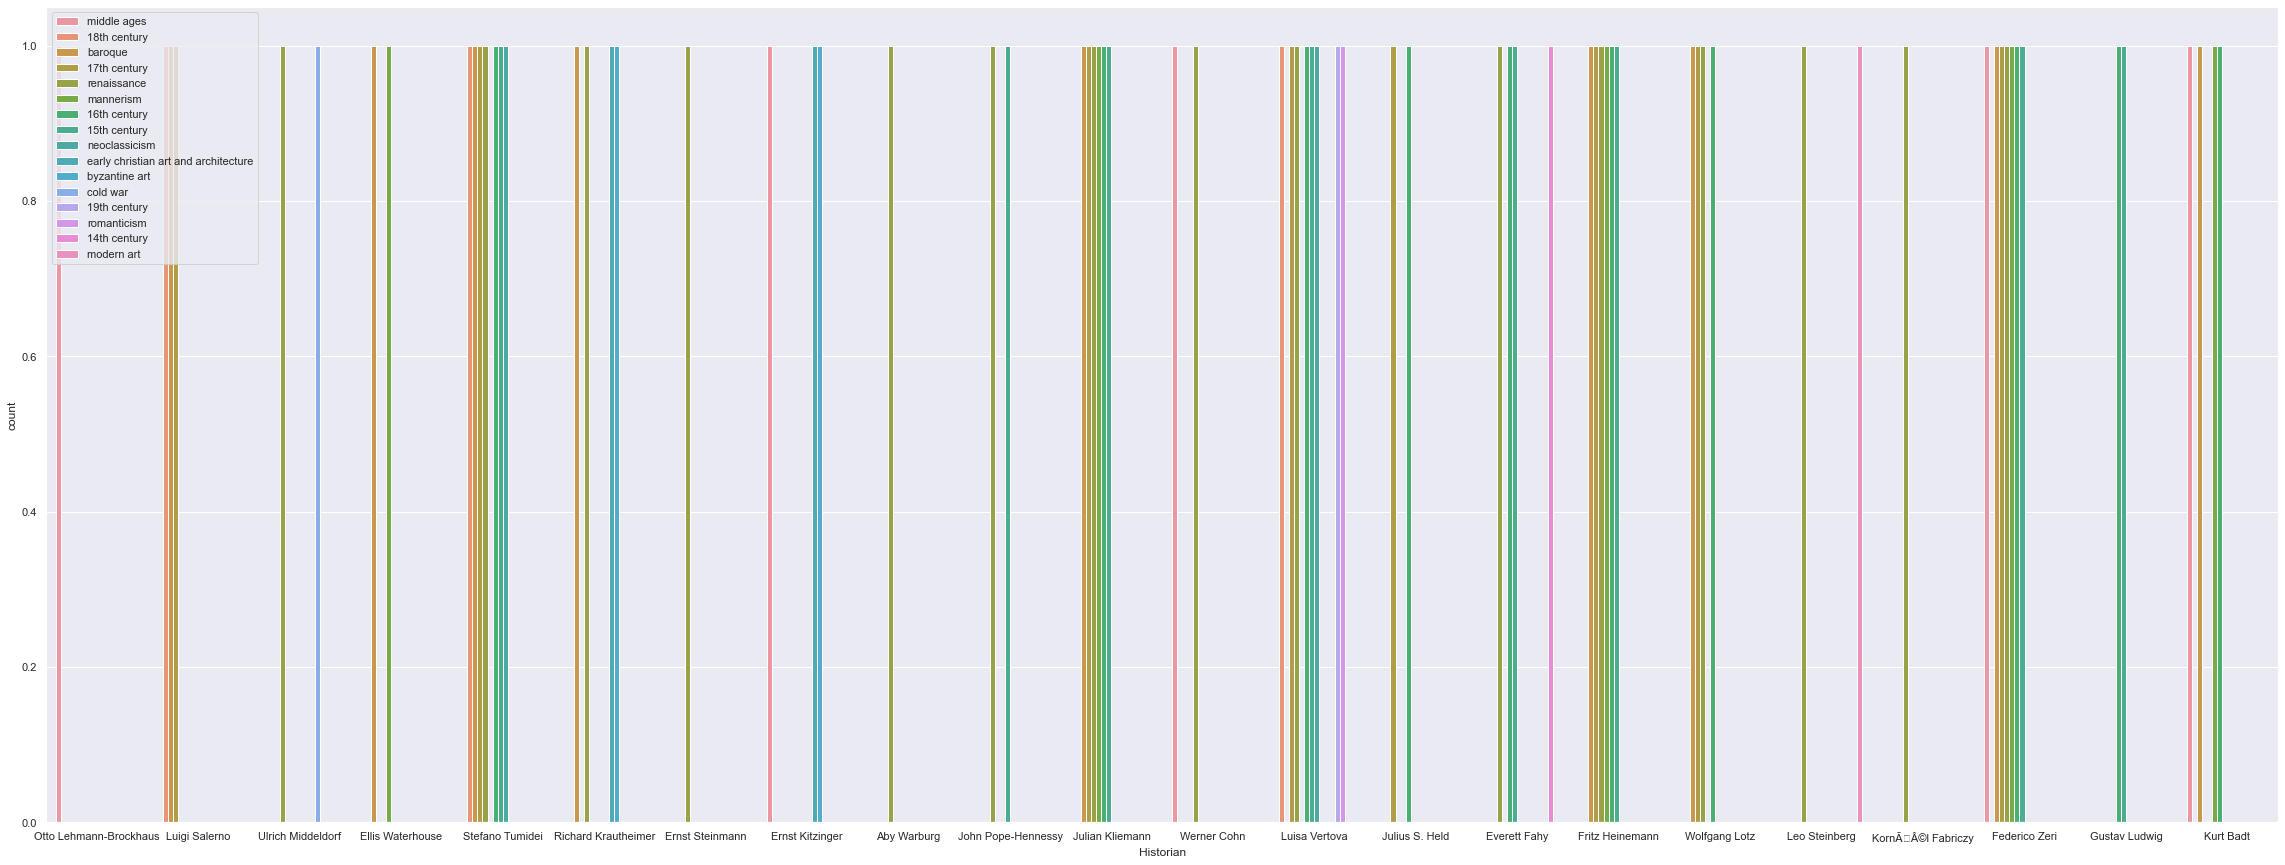

In [78]:
#create a visualization for: PERIODS STUDIED BY EACH HISTORIAN
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Historian", hue="Period", data=df)
plt.legend(loc='upper left')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


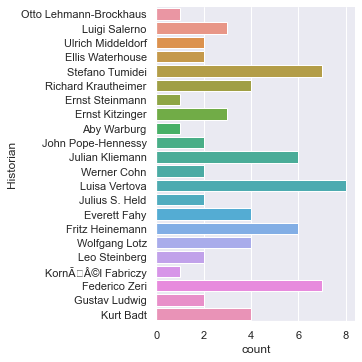

In [79]:
#plot the COUNT OF PERIODS STUDIED BY EACH HISTORIAN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
ax = sns.catplot(y="Historian", kind= "count", data= df)

In [80]:
#create a: PIE CHART: NUMBER OF PERIODS STUDIED BY EACH HISTORIAN
from math import pi
import pandas as pd
from bokeh.io import output_file, show, curdoc 
from bokeh.plotting import figure
from bokeh.transform import cumsum
import random

output_file("pie_historian_periods.html")
curdoc().theme = 'dark_minimal'

x ={
     'Ernst Kitzinger':3,
     'Gustav Ludwig':2,
     'Kornél Fabriczy':4,
     'Richard Krautheimer':4, 
     'Ellis Waterhouse':2, 
     'Everett Fahy':4, 
     'Kurt Badt':4, 
     'Luisa Vertova':8, 
     'Luigi Salerno':3, 
     'Julius S. Held':2, 
     'John Pope-Hennessy':2, 
     'Julian Kliemann':6, 
     'Aby Warburg':1, 
     'Werner Cohn':2, 
     'Leo Steinberg':2, 
     'Ernst Steinmann':1, 
     'Stefano Tumidei':7, 
     'Ulrich Middeldorf':2, 
     'Fritz Heinemann':6, 
     'Wolfgang Lotz':4, 
     'Otto Lehmann-Brockhaus':1, 
     'Federico Zeri':7
 }


data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Historians'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
number_of_colors = 22 # pick random colors for the historians
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
data['color'] = palette

p = figure(plot_height=700, title="Number of Collections per Historian", toolbar_location=None,
           tools="hover", tooltips="@Historians: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Historians', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [86]:
#create the MATRIX with the number of collection per historian FOR THE PIE CHART
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods_without_dupes.csv') as csvfile:
    historians = [] 
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique historians
       
    print(historians)
    periods_zeros_matrix = np.array(np.zeros((len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over historians and their index position  
            with open('historian_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[0] == histo:  
                        periods_zeros_matrix[i] = int(periods_zeros_matrix[i])+1
    
    periods_zeros_matrix
    

print(periods_zeros_matrix)

['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfgang Lotz', 'Leo Steinberg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Gustav Ludwig', 'Kurt Badt']
[1. 3. 2. 2. 7. 4. 1. 3. 1. 2. 6. 2. 8. 2. 4. 6. 4. 2. 1. 7. 2. 4.]


In [87]:
#historian and related period matrix 
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods_without_dupes.csv', encoding="utf8") as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) 
        if row[1] not in periods:
            periods.append(row[1]) 
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): 
        for j, period in enumerate(periods):
            with open('historian_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfgang Lotz', 'Leo Steinberg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Gustav Ludwig', 'Kurt Badt']
['middle ages', '18th century', 'baroque', '17th century', 'renaissance', 'mannerism', '16th century', '15th century', 'neoclassicism', 'early christian art and architecture', 'byzantine art', 'cold war', '19th century', 'romanticism', '14th century', 'modern art']
{'Historians': ['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfg

In [94]:
#BARCHART of Artistic Periods studied by each art historian
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.layouts import row
import random
#black bar nested colormapped, not particularly clear
output_file("bar_nested_colormapped_period_histo.html")

historians = ['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfgang Lotz', 'Leo Steinberg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Gustav Ludwig', 'Kurt Badt']
periods = ['middle ages', '18th century', 'baroque', '17th century', 'renaissance', 'mannerism', '16th century', '15th century', 'neoclassicism', 'early christian art and architecture', 'byzantine art', 'cold war', '19th century', 'romanticism', '14th century', 'modern art']
data = {'Historians': ['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfgang Lotz', 'Leo Steinberg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Gustav Ludwig', 'Kurt Badt'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], '16th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0], '17th century': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], '18th century': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0], 'byzantine art': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], 'middle ages': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
number_of_colors = 18 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['middle ages'], data['18th century'], data['baroque'], data['17th century'], data['renaissance'], data['mannerism'], data['16th century'], data['15th century'], data['neoclassicism'], data['early christian art and architecture'],data['byzantine art'], data['cold war'], data['19th century'], data['romanticism'], data['14th century'], data['modern art'],), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=4000, title="Number of Periods studied by each Historian",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.unapply_theme()
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None
p.xaxis.major_label_standoff = 30

show(row(p))



In [96]:
#create a BARCHART of historians and their studied periods
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure

output_file("bar_stacked_split.html")
#period studied by historians
historians = ['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfgang Lotz', 'Leo Steinberg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Gustav Ludwig', 'Kurt Badt']
periods = ['middle ages', '18th century', 'baroque', '17th century', 'renaissance', 'mannerism', '16th century', '15th century', 'neoclassicism', 'early christian art and architecture', 'byzantine art', 'cold war', '19th century', 'romanticism', '14th century', 'modern art']

data = {'Historians': ['Otto Lehmann-Brockhaus', 'Luigi Salerno', 'Ulrich Middeldorf', 'Ellis Waterhouse', 'Stefano Tumidei', 'Richard Krautheimer', 'Ernst Steinmann', 'Ernst Kitzinger', 'Aby Warburg', 'John Pope-Hennessy', 'Julian Kliemann', 'Werner Cohn', 'Luisa Vertova', 'Julius S. Held', 'Everett Fahy', 'Fritz Heinemann', 'Wolfgang Lotz', 'Leo Steinberg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Gustav Ludwig', 'Kurt Badt'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], '16th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0], '17th century': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], '18th century': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0], 'byzantine art': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], 'middle ages': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
number_of_colors = 16 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

p = figure(y_range=historians, plot_width=850, plot_height=750, x_range=(-18, 18), title="Periods treated in Historians' Collections",
           toolbar_location=None, tools="hover", tooltips="$name: @$name")

p.hbar_stack(periods, y='Historians', width=0, height=0.9, color=palette, source=ColumnDataSource(data),
             legend_label=["%s" % x for x in periods])

p.unapply_theme()
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "top_left"
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)

In [ ]:
new query: relate collections to keepers

In [97]:
#RELATE COLLECTIONS TO KEEPERS

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

#search the label of the collection and the institute in which it is 
    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Keeper
    WHERE {
         ?keep a wd:Q31855 ; 
                 rdfs:label ?Keeper .
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Keeper
    """)
#create a csv file
with open('collection_keeper.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Keeper'])
    for Collection, Keeper in query_result:
#create a dataframe with pandas        
import pandas as pd
data = pd.read_csv('collection_keeper.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

Collection  \
0                           John Pope-Hennessy papers   
1                     Nachlass Cornelius von Fabriczy   
2                 Battisti Eugenio (complex of fonds)   
3                               Julius S. Held papers   
4                     Nachlass Otto Lehmann-Brockhaus   
5                                       Fototeca Zeri   
6                   Ernst Kitzinger papers, 1931-1995   
7                            Fototeca Stefano Tumidei   
8   Nachlass Fritz Heinemann, Notizen zur venezian...   
9                                   Fondo Aby Warburg   
10                  Venturi Adolfo (complex of fonds)   
11   Ellis K. Waterhouse notebooks and research files   
12                           Ulrich Middledorf papers   
13                           Fototeca Julian Kliemann   
14                         Nachlass Ulrich Middeldorf   
15                           Nachlass Ernst Steinmann   
16                      Luigi Salerno research papers   
17                             Nachlass Wolfgang Lotz   
18                       Nachlass Richard Krautheimer   
19                                 Nachlass Kurt Badt   
20                             Archivio Luisa Vertova   
21                      Leo Steinberg research papers   
22                         Gustav Ludwig-VermÃ¤chtnis   
23                               Nachlass Werner Cohn   
24                                      Fototeca Fahy   
25                          John Pope-Hennessy papers   
26                    Nachlass Cornelius von Fabriczy   
27                Battisti Eugenio (complex of fonds)   
28                              Julius S. Held papers   
29                    Nachlass Otto Lehmann-Brockhaus   

                                   Keeper  
0                Scuola Normale Superiore  
1                Scuola Normale Superiore  
2                Scuola Normale Superiore  
3                Scuola Normale Superiore  
4                Scuola Normale Superiore  
5                Scuola Normale Superiore  
6                Scuola Normale Superiore  
7                Scuola Normale Superiore  
8                Scuola Normale Superiore  
9                Scuola Normale Superiore  
10               Scuola Normale Superiore  
11               Scuola Normale Superiore  
12               Scuola Normale Superiore  
13               Scuola Normale Superiore  
14               Scuola Normale Superiore  
15               Scuola Normale Superiore  
16               Scuola Normale Superiore  
17               Scuola Normale Superiore  
18               Scuola Normale Superiore  
19               Scuola Normale Superiore  
20               Scuola Normale Superiore  
21               Scuola Normale Superiore  
22               Scuola Normale Superiore  
23               Scuola Normale Superiore  
24               Scuola Normale Superiore  
25  Kunsthistorisches Institut in Florenz  
26  Kunsthistorisches Institut in Florenz  
27  Kunsthistorisches Institut in Florenz  
28  Kunsthistorisches Institut in Florenz  
29  Kunsthistorisches Institut in Florenz

In [98]:
import csv
import pandas as pd


with open("collection_keeper.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

                                           Collection  \
0                           John Pope-Hennessy papers   
1                     Nachlass Cornelius von Fabriczy   
2                 Battisti Eugenio (complex of fonds)   
3                               Julius S. Held papers   
4                     Nachlass Otto Lehmann-Brockhaus   
5                                       Fototeca Zeri   
6                   Ernst Kitzinger papers, 1931-1995   
7                            Fototeca Stefano Tumidei   
8   Nachlass Fritz Heinemann, Notizen zur venezian...   
9                                   Fondo Aby Warburg   
10                  Venturi Adolfo (complex of fonds)   
11   Ellis K. Waterhouse notebooks and research files   
12                           Ulrich Middledorf papers   
13                           Fototeca Julian Kliemann   
14                         Nachlass Ulrich Middeldorf   
15                           Nachlass Ernst Steinmann   
16                      Luigi S

In [123]:
#delete the duplicates from the file created before
import pandas as pd
file_name = "collection_keeper.csv"
file_name_output = "collection_keeper_periods_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")


df = pd.read_csv("collection_keeper_periods_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')

df.drop_duplicates('Collection', keep= 'last')
df.drop_duplicates('Keeper', keep= 'last')

df.head(40)

Collection  \
0                           John Pope-Hennessy papers   
1                     Nachlass Cornelius von Fabriczy   
2                 Battisti Eugenio (complex of fonds)   
3                               Julius S. Held papers   
4                     Nachlass Otto Lehmann-Brockhaus   
5                                       Fototeca Zeri   
6                   Ernst Kitzinger papers, 1931-1995   
7                            Fototeca Stefano Tumidei   
8   Nachlass Fritz Heinemann, Notizen zur venezian...   
9                                   Fondo Aby Warburg   
10                  Venturi Adolfo (complex of fonds)   
11   Ellis K. Waterhouse notebooks and research files   
12                           Ulrich Middledorf papers   
13                           Fototeca Julian Kliemann   
14                         Nachlass Ulrich Middeldorf   
15                           Nachlass Ernst Steinmann   
16                      Luigi Salerno research papers   
17                             Nachlass Wolfgang Lotz   
18                       Nachlass Richard Krautheimer   
19                                 Nachlass Kurt Badt   
20                             Archivio Luisa Vertova   
21                      Leo Steinberg research papers   
22                       Gustav Ludwig-VermÃÂ¤chtnis   
23                               Nachlass Werner Cohn   
24                                      Fototeca Fahy   
25                          John Pope-Hennessy papers   
26                    Nachlass Cornelius von Fabriczy   
27                Battisti Eugenio (complex of fonds)   
28                              Julius S. Held papers   
29                    Nachlass Otto Lehmann-Brockhaus   
30                                      Fototeca Zeri   
31                  Ernst Kitzinger papers, 1931-1995   
32                           Fototeca Stefano Tumidei   
33  Nachlass Fritz Heinemann, Notizen zur venezian...   
34                                  Fondo Aby Warburg   
35                  Venturi Adolfo (complex of fonds)   
36   Ellis K. Waterhouse notebooks and research files   
37                           Ulrich Middledorf papers   
38                           Fototeca Julian Kliemann   
39                         Nachlass Ulrich Middeldorf   

                                   Keeper  
0                Scuola Normale Superiore  
1                Scuola Normale Superiore  
2                Scuola Normale Superiore  
3                Scuola Normale Superiore  
4                Scuola Normale Superiore  
5                Scuola Normale Superiore  
6                Scuola Normale Superiore  
7                Scuola Normale Superiore  
8                Scuola Normale Superiore  
9                Scuola Normale Superiore  
10               Scuola Normale Superiore  
11               Scuola Normale Superiore  
12               Scuola Normale Superiore  
13               Scuola Normale Superiore  
14               Scuola Normale Superiore  
15               Scuola Normale Superiore  
16               Scuola Normale Superiore  
17               Scuola Normale Superiore  
18               Scuola Normale Superiore  
19               Scuola Normale Superiore  
20               Scuola Normale Superiore  
21               Scuola Normale Superiore  
22               Scuola Normale Superiore  
23               Scuola Normale Superiore  
24               Scuola Normale Superiore  
25  Kunsthistorisches Institut in Florenz  
26  Kunsthistorisches Institut in Florenz  
27  Kunsthistorisches Institut in Florenz  
28  Kunsthistorisches Institut in Florenz  
29  Kunsthistorisches Institut in Florenz  
30  Kunsthistorisches Institut in Florenz  
31  Kunsthistorisches Institut in Florenz  
32  Kunsthistorisches Institut in Florenz  
33  Kunsthistorisches Institut in Florenz  
34  Kunsthistorisches Institut in Florenz  
35  Kunsthistorisches Institut in Florenz  
36  Kunsthistorisches Institut in Florenz  
37  Kunsthistorisches Institut in

In [124]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


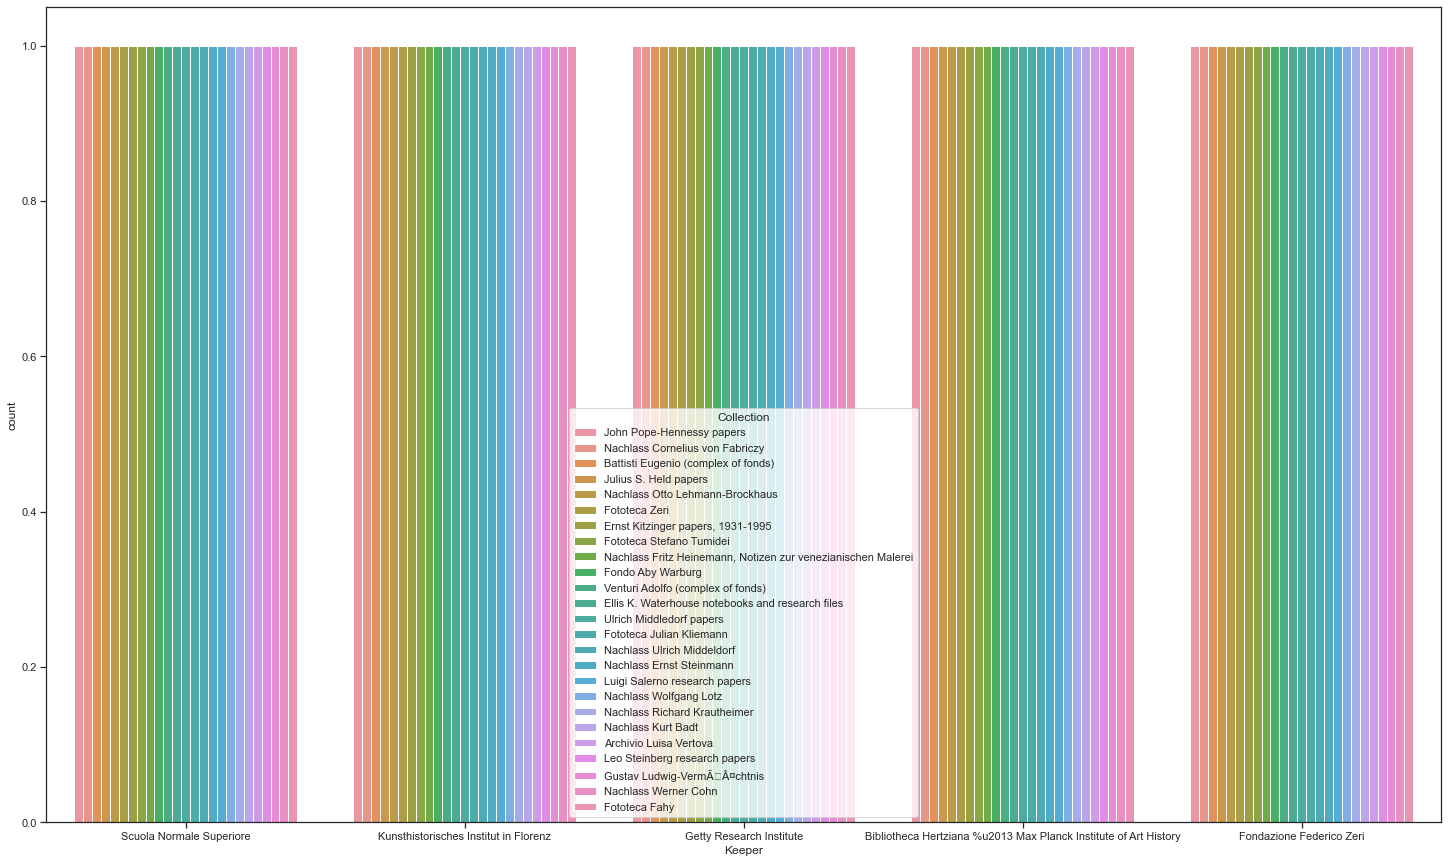

In [125]:
# the visualization shows that every keeper has all the collections
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Collection", data=df) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Scuola Normale Superiore'),
  Text(1, 0, 'Kunsthistorisches Institut in Florenz'),
  Text(2, 0, 'Getty Research Institute'),
  Text(3, 0, 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History'),
  Text(4, 0, 'Fondazione Federico Zeri')])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


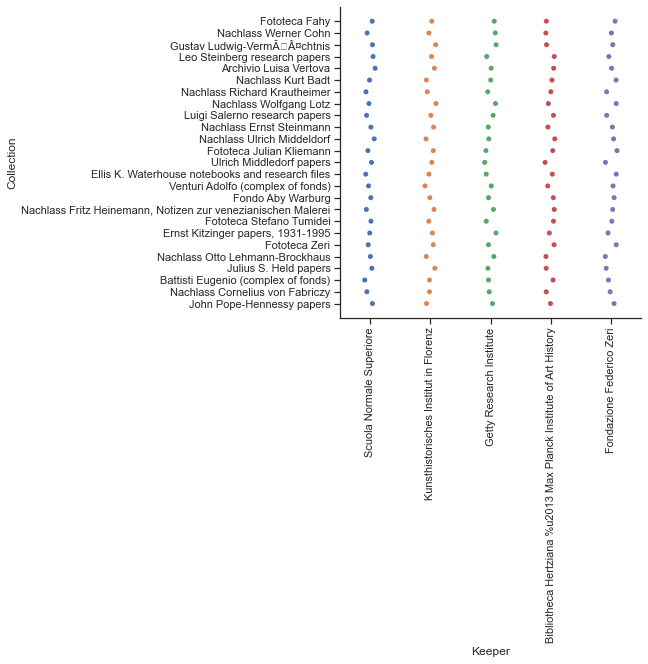

In [128]:
#catplot of collections and keepers, not a great visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme(style="ticks")

g = sns.catplot(x="Keeper", y="Collection", data=df)
plt.xticks(rotation=90)


In [129]:
#create the MATRIX of keepers and collections
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('collection_keeper_periods_without_dupes.csv') as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) 
        if row[1] not in periods:
            periods.append(row[1]) 
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): 
        for j, period in enumerate(periods):
            with open('collection_keeper_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['John Pope-Hennessy papers', 'Nachlass Cornelius von Fabriczy', 'Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Nachlass Otto Lehmann-Brockhaus', 'Fototeca Zeri', 'Ernst Kitzinger papers, 1931-1995', 'Fototeca Stefano Tumidei', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Fondo Aby Warburg', 'Venturi Adolfo (complex of fonds)', 'Ellis K. Waterhouse notebooks and research files', 'Ulrich Middledorf papers', 'Fototeca Julian Kliemann', 'Nachlass Ulrich Middeldorf', 'Nachlass Ernst Steinmann', 'Luigi Salerno research papers', 'Nachlass Wolfgang Lotz', 'Nachlass Richard Krautheimer', 'Nachlass Kurt Badt', 'Archivio Luisa Vertova', 'Leo Steinberg research papers', 'Gustav Ludwig-VermÃ¤chtnis', 'Nachlass Werner Cohn', 'Fototeca Fahy']
['Scuola Normale Superiore', 'Kunsthistorisches Institut in Florenz', 'Getty Research Institute', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Fondazione Federico Zeri']
{'Historians': ['John Pope-He

In [149]:
#the collections can be found in EVERY institute
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import random

output_file("bar_nested_colormapped_coll_keep.html")

periods = ['Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Leo Steinberg research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Nachlass Cornelius von Fabriczy', 'Fototeca Stefano Tumidei', 'Fototeca Fahy', 'John Pope-Hennessy papers', 'Ellis K. Waterhouse notebooks and research files', 'Gustav Ludwig-Vermächtnis', 'Nachlass Werner Cohn', 'Nachlass Ulrich Middeldorf', 'Nachlass Wolfgang Lotz', 'Fototeca Zeri', 'Fondo Aby Warburg', 'Fototeca Julian Kliemann', 'Nachlass Richard Krautheimer', 'Nachlass Ernst Steinmann', 'Nachlass Kurt Badt', 'Venturi Adolfo (complex of fonds)', 'Ulrich Middledorf papers', 'Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei']
historians = ['Getty Research Institute', 'Scuola Normale Superiore', 'Kunsthistorisches Institut in Florenz', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Fondazione Federico Zeri']
data = {'Historians': ['Ernst Kitzinger papers, 1931-1995', 'Nachlass Werner Cohn', 'Fototeca Fahy', 'Nachlass Cornelius von Fabriczy', 'Archivio Luisa Vertova', 'Nachlass Wolfgang Lotz', 'Ellis K. Waterhouse notebooks and research files', 'Fondo Aby Warburg', 'Nachlass Richard Krautheimer', 'Nachlass Ulrich Middeldorf', 'Fototeca Julian Kliemann', 'Gustav Ludwig-Vermächtnis', 'Leo Steinberg research papers', 'Fototeca Zeri', 'Battisti Eugenio (complex of fonds)', 'Nachlass Kurt Badt', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Ernst Steinmann', 'Ulrich Middledorf papers', 'Fototeca Stefano Tumidei', 'Julius S. Held papers', 'John Pope-Hennessy papers', 'Luigi Salerno research papers', 'Venturi Adolfo (complex of fonds)', 'Nachlass Otto Lehmann-Brockhaus'], 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Fondazione Federico Zeri': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Getty Research Institute': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Kunsthistorisches Institut in Florenz': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Scuola Normale Superiore': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
number_of_colors = 40 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['Getty Research Institute'], data['Scuola Normale Superiore'], data['Kunsthistorisches Institut in Florenz'], data['Bibliotheca Hertziana %u2013 Max Planck Institute of Art History'], data['Fondazione Federico Zeri']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=7000, title="Number of Collection for Keeper",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xaxis.major_label_standoff = 70
p.xgrid.grid_line_color = None

show(p) #this is not so user friendly

plotting collections and periods

In [131]:
#analyze relations between collections and periods

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

#search the label of collections and the artistic periods inside the collections
    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                 rdfs:label ?Collection ;
                 art:hasSubjectPeriod ?per .
        ?per rdfs:label ?Period
    }
    GROUP BY ?Collection ?Period
    """)

with open('coll_periodo.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Period'])
    for Collection, Period in query_result:
        csv_writer.writerow([Collection.strip(), Period.lower().strip()]) 
        
import pandas as pd
data = pd.read_csv('coll_periodo.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

Collection        Period
0                      Luigi Salerno research papers  17th century
1                      Luigi Salerno research papers  17th century
2                      Luigi Salerno research papers  17th century
3                      Luigi Salerno research papers  17th century
4                      Luigi Salerno research papers  17th century
5                      Luigi Salerno research papers  17th century
6                      Luigi Salerno research papers  17th century
7                             Archivio Luisa Vertova   romanticism
8   Ellis K. Waterhouse notebooks and research files       baroque
9   Ellis K. Waterhouse notebooks and research files       baroque
10  Ellis K. Waterhouse notebooks and research files       baroque
11  Ellis K. Waterhouse notebooks and research files       baroque
12  Ellis K. Waterhouse notebooks and research files       baroque
13  Ellis K. Waterhouse notebooks and research files       baroque
14  Ellis K. Waterhouse notebooks and research files       baroque
15  Ellis K. Waterhouse notebooks and research files       baroque
16  Ellis K. Waterhouse notebooks and research files       baroque
17  Ellis K. Waterhouse notebooks and research files       baroque
18  Ellis K. Waterhouse notebooks and research files       baroque
19                                     Fototeca Zeri   middle ages
20                                     Fototeca Zeri   middle ages
21                                     Fototeca Zeri   middle ages
22                                     Fototeca Zeri   middle ages
23                                     Fototeca Zeri   middle ages
24                                     Fototeca Zeri   middle ages
25                             Julius S. Held papers  16th century
26                             Julius S. Held papers  16th century
27                             Julius S. Held papers  16th century
28                             Julius S. Held papers  16th century
29                             Julius S. Held papers  16th century

In [132]:
#delete the duplicates from the file created before
import pandas as pd
file_name = "coll_periodo.csv"
file_name_output = "coll_periodo_no_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')
#delete the duplicates creating a new file: periods and collections without duplicates

df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [133]:
df = pd.read_csv("coll_periodo_no_dupes.csv", delimiter=',', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')
    
df.drop_duplicates("Collection", keep= "last")
df.drop_duplicates("Period", keep="last")



df.head(80)

Collection         Period
0                      Luigi Salerno research papers   17th century
1                             Archivio Luisa Vertova    romanticism
2   Ellis K. Waterhouse notebooks and research files        baroque
3                                      Fototeca Zeri    middle ages
4                              Julius S. Held papers   16th century
..                                               ...            ...
69                            Nachlass Wolfgang Lotz   16th century
70                          Fototeca Julian Kliemann   16th century
71                 Ernst Kitzinger papers, 1931-1995  byzantine art
72                 Ernst Kitzinger papers, 1931-1995    middle ages
73                          Fototeca Julian Kliemann      mannerism

[74 rows x 2 columns]

In [134]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '17th century'),
  Text(1, 0, 'romanticism'),
  Text(2, 0, 'baroque'),
  Text(3, 0, 'middle ages'),
  Text(4, 0, '16th century'),
  Text(5, 0, 'renaissance'),
  Text(6, 0, '15th century'),
  Text(7, 0, 'mannerism'),
  Text(8, 0, 'neoclassicism'),
  Text(9, 0, 'early christian art and architecture'),
  Text(10, 0, '18th century'),
  Text(11, 0, 'cold war'),
  Text(12, 0, 'modern art'),
  Text(13, 0, '19th century'),
  Text(14, 0, 'byzantine art'),
  Text(15, 0, '14th century')])

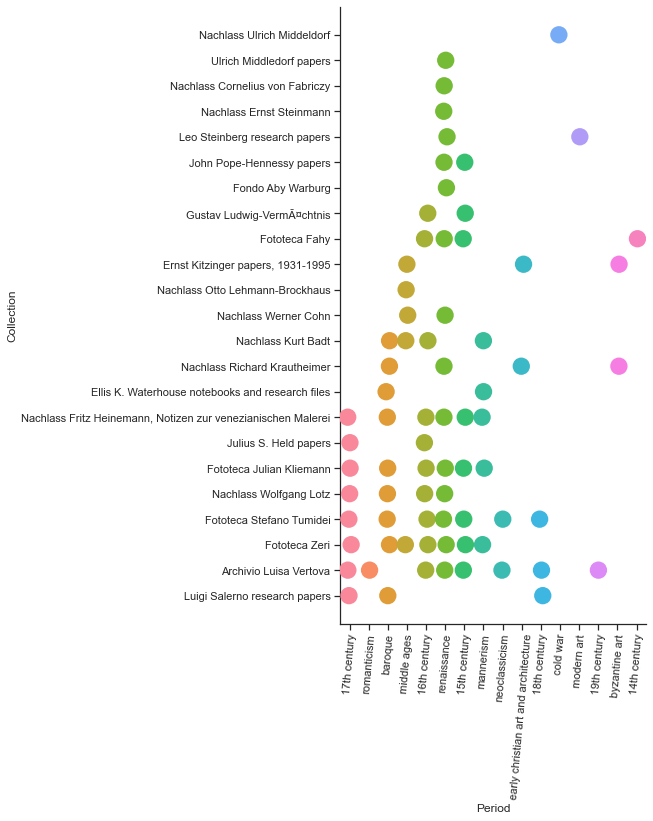

In [139]:
#visualization of collections and periods inside them
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.catplot(x="Period", y="Collection", sizes=(300, 300),data=df, height=9.2)
plt.xticks(rotation=85)

In [140]:
#collections and related period matrix
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('coll_periodo_no_dupes.csv') as csvfile:
    collections = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in collections:
            collections.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(collections)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(collections) ))) # rows, columns
    
    for i, coll in enumerate(collections): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('coll_periodo_no_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == coll:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Collection"] = collections
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ellis K. Waterhouse notebooks and research files', 'Fototeca Zeri', 'Julius S. Held papers', 'Gustav Ludwig-VermÃ¤chtnis', 'Fototeca Fahy', 'Nachlass Werner Cohn', 'Nachlass Richard Krautheimer', 'Fondo Aby Warburg', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Kurt Badt', 'John Pope-Hennessy papers', 'Fototeca Stefano Tumidei', 'Nachlass Ulrich Middeldorf', 'Ernst Kitzinger papers, 1931-1995', 'Leo Steinberg research papers', 'Nachlass Ernst Steinmann', 'Nachlass Wolfgang Lotz', 'Fototeca Julian Kliemann', 'Nachlass Cornelius von Fabriczy', 'Ulrich Middledorf papers', 'Nachlass Otto Lehmann-Brockhaus']
['17th century', 'romanticism', 'baroque', 'middle ages', '16th century', 'renaissance', '15th century', 'mannerism', 'neoclassicism', 'early christian art and architecture', '18th century', 'cold war', 'modern art', '19th century', 'byzantine art', '14th century']
{'Collection': ['Luigi Salerno re

In [148]:
#plot the artistic periods curated in the correspondent collection
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure
import random

output_file("bar_coll_periods.html")

collections = ['Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ellis K. Waterhouse notebooks and research files', 'Fototeca Zeri', 'Julius S. Held papers', 'Gustav Ludwig-VermÃ¤chtnis', 'Fototeca Fahy', 'Nachlass Werner Cohn', 'Nachlass Richard Krautheimer', 'Fondo Aby Warburg', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Kurt Badt', 'John Pope-Hennessy papers', 'Fototeca Stefano Tumidei', 'Nachlass Ulrich Middeldorf', 'Ernst Kitzinger papers, 1931-1995', 'Leo Steinberg research papers', 'Nachlass Ernst Steinmann', 'Nachlass Wolfgang Lotz', 'Fototeca Julian Kliemann', 'Nachlass Cornelius von Fabriczy', 'Ulrich Middledorf papers', 'Nachlass Otto Lehmann-Brockhaus']
periods = ['17th century', 'romanticism', 'baroque', 'middle ages', '16th century', 'renaissance', '15th century', 'mannerism', 'neoclassicism', 'early christian art and architecture', '18th century', 'cold war', 'modern art', '19th century', 'byzantine art', '14th century']
data = {'Collection': ['Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ellis K. Waterhouse notebooks and research files', 'Fototeca Zeri', 'Julius S. Held papers', 'Gustav Ludwig-VermÃ¤chtnis', 'Fototeca Fahy', 'Nachlass Werner Cohn', 'Nachlass Richard Krautheimer', 'Fondo Aby Warburg', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Kurt Badt', 'John Pope-Hennessy papers', 'Fototeca Stefano Tumidei', 'Nachlass Ulrich Middeldorf', 'Ernst Kitzinger papers, 1931-1995', 'Leo Steinberg research papers', 'Nachlass Ernst Steinmann', 'Nachlass Wolfgang Lotz', 'Fototeca Julian Kliemann', 'Nachlass Cornelius von Fabriczy', 'Ulrich Middledorf papers', 'Nachlass Otto Lehmann-Brockhaus'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], '16th century': [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], '17th century': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], '18th century': [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], 'byzantine art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'middle ages': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], 'romanticism': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
number_of_colors = 16 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

p = figure(y_range=collections, plot_width=950, plot_height=750, x_range=(-18, 18), title="Artistic Periods inside each Collection",
           toolbar_location=None, tools="hover", tooltips="$name: @$name")

p.hbar_stack(periods, y='Collection', width=0, height=0.8, color=palette, source=ColumnDataSource(data),
             legend_label=["%s" % x for x in periods])

p.unapply_theme()
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "top_left"
p.yaxis.major_label_standoff= 40
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)

query and plot the relation between keeper and the period treated in the correspondent collection stored in it

In [116]:
#search artistic periods studied in each institute
import rdflib
import csv
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pprint


wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
#we do not need to use sparqlwrapper wikidata endpoint!

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

#search the label of artistic periods studied in each institute and label of institutes
query_keepers = g.query('''
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wdp: <http://www.wikidata.org/wiki/Property:>
PREFIX art: <https://w3id.org/artchives/>
PREFIX wd: <http://www.wikidata.org/entity/>
SELECT DISTINCT  ?Period ?Keeper
WHERE {
 ?keep a wd:Q31855 ; 
         rdfs:label ?Keeper ; 
         wdt:P17 ?country .
 ?coll art:hasSubjectPeriod ?peri .
 ?country rdfs:label ?nameCountry .
 ?peri rdfs:label ?Period . 
}
GROUP BY  ?Period ?Keeper 
''') 


with open('keepers.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    csv_writer.writerow(["Period", "Keeper"])
    # access the rows of the query results
    for Period, Keeper in query_keepers:
        # write in the csv
        csv_writer.writerow([Period.lower().strip(), Keeper.strip()])        

        
import pandas as pd
data = pd.read_csv('keepers.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(20)

Period                    Keeper
0    renaissance  Getty Research Institute
1    renaissance  Getty Research Institute
2    renaissance  Getty Research Institute
3    renaissance  Getty Research Institute
4    renaissance  Getty Research Institute
5    renaissance  Getty Research Institute
6    renaissance  Getty Research Institute
7    renaissance  Getty Research Institute
8    renaissance  Getty Research Institute
9    renaissance  Getty Research Institute
10   renaissance  Getty Research Institute
11  15th century  Getty Research Institute
12  15th century  Getty Research Institute
13  15th century  Getty Research Institute
14  15th century  Getty Research Institute
15  15th century  Getty Research Institute
16  15th century  Getty Research Institute
17  15th century  Getty Research Institute
18  17th century  Getty Research Institute
19  17th century  Getty Research Institute

In [117]:
import pandas as pd
file_name = "keepers.csv"
file_name_output = "kep_per_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")


df = pd.read_csv("kep_per_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
   
df.drop_duplicates('Period', keep= 'last')
df.drop_duplicates('Keeper', keep= 'last')

df.head(40)

Period                    Keeper
0                            renaissance  Getty Research Institute
1                           15th century  Getty Research Institute
2                           17th century  Getty Research Institute
3                              mannerism  Getty Research Institute
4                                baroque  Getty Research Institute
5                             modern art  Getty Research Institute
6                           16th century  Getty Research Institute
7                          byzantine art  Getty Research Institute
8                          neoclassicism  Getty Research Institute
9                           18th century  Getty Research Institute
10                           middle ages  Getty Research Institute
11                          19th century  Getty Research Institute
12  early christian art and architecture  Getty Research Institute
13                              cold war  Getty Research Institute
14                          14th century  Getty Research Institute
15                           romanticism  Getty Research Institute
16                           renaissance  Scuola Normale Superiore
17                          15th century  Scuola Normale Superiore
18                          17th century  Scuola Normale Superiore
19                             mannerism  Scuola Normale Superiore
20                               baroque  Scuola Normale Superiore
21                            modern art  Scuola Normale Superiore
22                          16th century  Scuola Normale Superiore
23                         byzantine art  Scuola Normale Superiore
24                         neoclassicism  Scuola Normale Superiore
25                          18th century  Scuola Normale Superiore
26                           middle ages  Scuola Normale Superiore
27                          19th century  Scuola Normale Superiore
28  early christian art and architecture  Scuola Normale Superiore
29                              cold war  Scuola Normale Superiore
30                          14th century  Scuola Normale Superiore
31                           romanticism  Scuola Normale Superiore
32                           renaissance  Fondazione Federico Zeri
33                          15th century  Fondazione Federico Zeri
34                          17th century  Fondazione Federico Zeri
35                             mannerism  Fondazione Federico Zeri
36                               baroque  Fondazione Federico Zeri
37                            modern art  Fondazione Federico Zeri
38                          16th century  Fondazione Federico Zeri
39                         byzantine art  Fondazione Federico Zeri

In [118]:

import pandas_profiling as pp

pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

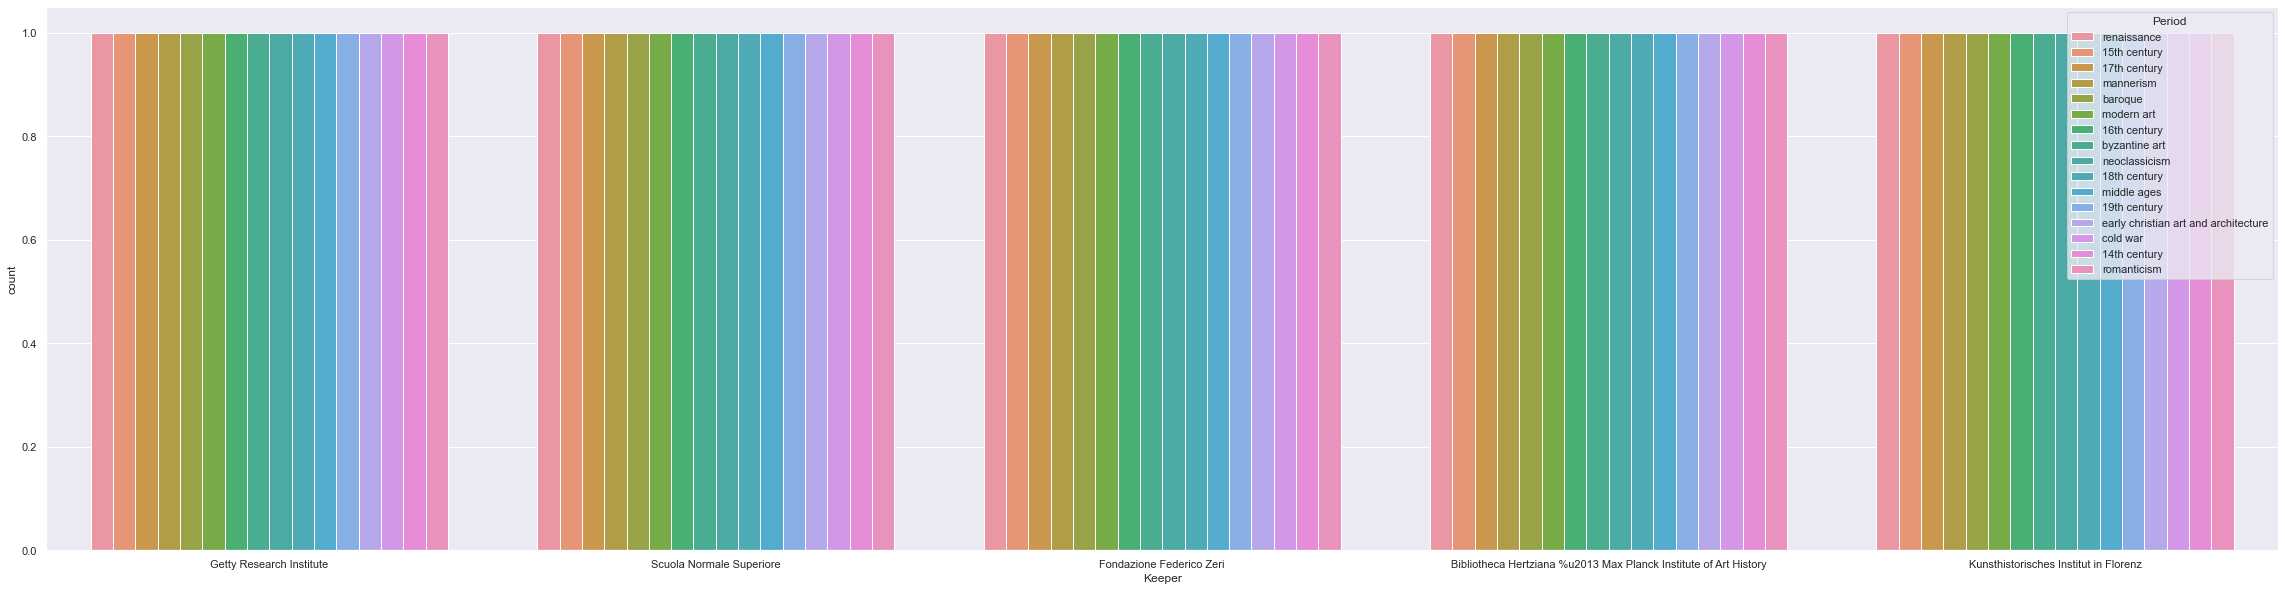

In [121]:
#visualization of periods in each institute
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Period", data=df)


try plotting periods per institutes: all periods are treated in the collections stored in the institutes